# GridSearch and Model with SVM (Support Vector Machines) - 6.05

Followed lesson 6.05  
I tried running a grid search for this, but in interest of time, I will run one model to add to my presentation. The grid search had 600 items, ran 33 in 16 minutes (Which left me hopeful) but 4 hours later, was still stuck at the same point. I decided not to optimize but run the default model, as Adi told us in lecture it was often considered one of the best classification models. Many of my other models did not have great accuracy scores so I wanted to try this one.


In [1]:
#import libraries, read in csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [2]:
posts_df_vec = pd.read_csv('./data/posts_df_vec.csv')

In [3]:
posts_df_vec.head(3)

,Unnamed: 0,author,subreddit,title,000,0320,08,10,100,10th,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
0,0,ManofTheNightsWatch,0,Severely Injured Woman Heroically Fights Off P...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Sanlear,0,Frat President Chews Out Brothers Infected Wit...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,aresef,0,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#create X and y varibales, split into train and test
X = posts_df_vec.drop(columns=['Unnamed: 0', 'author', 'subreddit', 'title'])
y = posts_df_vec['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17, stratify=y)

In [6]:
# This was the grid search I tried to run. I am keeping it as a comment to be able to one day go back to and run
# so that I may try and optimize my model to lower variation. 
# svc = SVC()
# params = {
#     'C':np.linspace(0,5,20),
#     'kernel':['linear', 'rbf', 'polynomial'],
#     'degree':[1,2]
    
# }

In [7]:
# gs_svc = GridSearchCV(estimator = svc,
#                      param_grid = params,
#                      n_jobs = 4,
#                      cv = 5,
#                      verbose = 2)
# gs_svc.fit(X_train, y_train)

In [8]:
# gs_svc.best_score_

In [9]:
# gs_svc.best_params_

In [10]:
#instantiate model and fit with train data
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
#get predictions and accuracy scores
y_pred = svc.predict(X_test)

In [12]:
print(accuracy_score(y_train, svc.predict(X_train)))
print(accuracy_score(y_test, svc.predict(X_test)))

0.9629140239605356
0.8491413474240422


The accuracy scores were much better than KNN or Random Forest so I will use this model for the second one in my project!

In [13]:
#Make and plot confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

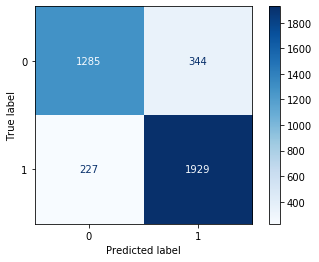

In [14]:
plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format='d')
plt.savefig('./images/svm_confusion');

In [15]:
#specificity
spec = tn/ (tn+fp)
spec

0.7888275015346838

In [16]:
#sensitivity
sens = tp/(tp+fn)
sens

0.8947124304267161

In [17]:
#accuracy
acc = (tp+tn)/ (tp+tn+fp+fn)
acc

0.8491413474240422

In [18]:
#misclassification 
misclass = 1- acc
misclass

0.15085865257595776

In [19]:
#precision
prec = tp/(tp+fp)
prec

0.8486581610206775

In [20]:
baseline = y.value_counts(normalize=True)
baseline

1    0.569532
0    0.430468
Name: subreddit, dtype: float64

In this notebook, I ran a support vector machine model, but unfortunately was unable to optimize it due to time/ processor constraints. This model had pretty good accuracy scores so I decided to use it for my second model in my project. In the future, I definitely want to optimize this model to hopefully improve my variation between train and test scores.